<a href="https://colab.research.google.com/github/Rami-RK/Machine-Learning-using-ML-library/blob/master/PCA_Walkthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IoT & Smart Analytics
## A Program by IIIT-H and TalentSprint

## Learning Objectives
At the end of the experiment, participants will be able to : 
* understand the importance of PCA
* apply PCA

#### Importing Required Packages

In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

Run given below syntaxes in a different cell to install libraries if required. \\
!pip install sklearn \\
!pip install pandas \\
!pip install matplotlib \\

#### Loading Data
Using SciKit-Learns ```fetch_openml``` to load MNIST data.

In [ ]:
mnist = fetch_openml('mnist_784', cache=False)

Understanding the data:

In [ ]:
print('Data Shape :',mnist.data.shape,'\n')
print('Keys : ',mnist.keys(),'\n')
print('Description :', mnist.DESCR)

Data Shape : (70000, 784) 

Keys :  dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url']) 

Description : **Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio.

Separating features and targets

In [ ]:
X, y = mnist["data"].values, mnist["target"].values
print(X.shape)
# Try running given below codes in new cells
# mnist["data"].info()
# mnist["data"].info()

(70000, 784)


Visualizing the data set

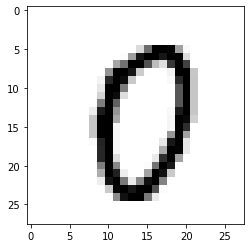

In [ ]:
sample_digit = X[1000] # Check the result by putting different values in square bracket 
sample_digit_image = sample_digit.reshape(28, 28)
plt.imshow(sample_digit_image, cmap=mpl.cm.binary)
plt.show()

Checking the corresponding label & converting the data type

In [ ]:
print(y[90])
print(type(y[90]))
y = y.astype(np.uint8)
print(type(y[90]))


6
<class 'str'>
<class 'numpy.uint8'>


#### Applying Classification Algorithm

Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
# We can use 'train_test_split' as given below :
# X_train, X_test, y_train, y_test = train_test_split(X, y)

Training:

In [ ]:
%%time
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train)

CPU times: user 2min 31s, sys: 148 ms, total: 2min 31s
Wall time: 2min 30s


Predicting an output for any given sample

In [ ]:
sgd_clf.predict([sample_digit])

array([0], dtype=uint8)

### Measuring Accuracy

In [ ]:
%%time
from sklearn.model_selection import cross_val_score
print(cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy"))

[0.87365 0.85835 0.8689 ]
CPU times: user 3min 59s, sys: 489 ms, total: 3min 59s
Wall time: 3min 58s


#### Training the model after reducing the features using PCA

#### Applying PCA and reducing the number of features

In [ ]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

154

In [ ]:
784

Understanding each syntax by running in individual cells

In [ ]:
pca.explained_variance_ratio_

In [ ]:
cumsum=np.cumsum(pca.explained_variance_ratio_)
cumsum

#### Visualizing the cumsum

Total number of features : 784 



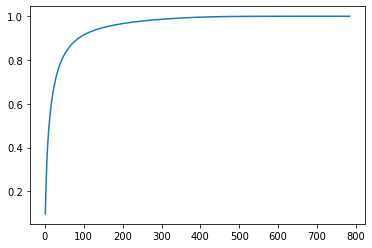

In [ ]:
n=len(cumsum)
print('Total number of features :', n,'\n')
xx=np.arange(1,n+1)
plt.plot(xx,cumsum)

#### Reducing the features of Training data using PCA

In [ ]:
pca=PCA(n_components=154)
X_train_reduced=pca.fit_transform(X_train)

In [ ]:
X_train_reduced.shape

(60000, 154)

#### Similarly reducing the features of Test data using PCA
visualizing any one data: 

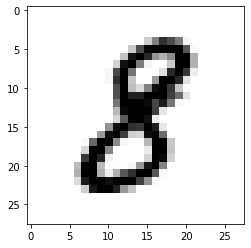

In [ ]:
sample_digit = X_test[110]
sample_digit_image = sample_digit.reshape(28, 28)
plt.imshow(sample_digit_image, cmap=mpl.cm.binary)
plt.show()

Reducing Test data feature:

In [ ]:
X_test_reduced=pca.fit_transform(X_test)

#### Applying Classification Algorithm after PCA
Now apply classification operation in 'X_reduced' data. While most of the variance(95%) is preserved, the dataset is now less than 20% of its original size. This speeds up the classification algorithm tremendously.

Training:

In [ ]:
%%time
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train_reduced, y_train)

CPU times: user 44.3 s, sys: 37.2 ms, total: 44.3 s
Wall time: 44.4 s


In [ ]:
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

Prediction:

In [ ]:
sgd_clf.predict([X_test_reduced[10]])

array([0], dtype=uint8)

In [ ]:
y_test[10]

0

### Measuring accuracy

In [ ]:
%%time
from sklearn.model_selection import cross_val_score
print(cross_val_score(sgd_clf, X_train_reduced, y_train, cv=3, scoring="accuracy"))

[0.87635 0.87255 0.88775]
CPU times: user 1min 24s, sys: 314 ms, total: 1min 24s
Wall time: 1min 25s


### Transform data back to its original space.
Reducing feature of X_train using PCA:

In [ ]:
pca=PCA(n_components=154)
X_reduced=pca.fit_transform(X_train)

Recovering back the features of X_reduced:

In [ ]:
X_recovered = pca.inverse_transform(X_reduced)

Visualizing and comparing with original data:
* Recovered sample image

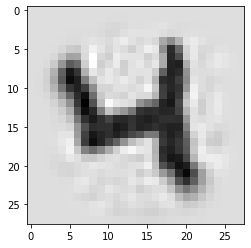

In [ ]:
sample_digit = X_recovered[20]
sample_digit_image = sample_digit.reshape(28, 28)
plt.imshow(sample_digit_image, cmap=mpl.cm.binary)
plt.show()

* Original sample image

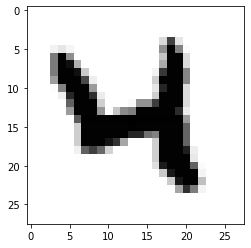

In [ ]:
sample_digit = X_train[20]
sample_digit_image = sample_digit.reshape(28, 28)
plt.imshow(sample_digit_image, cmap=mpl.cm.binary)
plt.show()